In [1]:

import numpy as np
from keras.models import Sequential
from keras.layers import GlobalMaxPooling2D
from keras.layers import GlobalAveragePooling2D

In [20]:
image = np.array([[2, 2, 7, 3],
                  [9, 4, 6, 1],
                  [8, 5, 2, 4],
                  [3, 1, 2, 6]])
image = image.reshape(1, 4, 4, 1)

In [4]:
gm_model = Sequential(
    [GlobalMaxPooling2D()])

2022-03-01 03:39:24.835157: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
ga_model = Sequential(
    [GlobalAveragePooling2D()])

In [6]:
gm_output = gm_model.predict(image)
ga_output = ga_model.predict(image)

In [9]:
gm_model

In [10]:
gm_output = np.squeeze(gm_output)
ga_output = np.squeeze(ga_output)

In [19]:
print("gm_output: {}".format(gm_output))
print("ga_output: ", ga_output)

gm_output: 9
ga_output:  4


array([2])

In [1]:

''' Classification of hand written digits using MNIST data set'''

' Classification of hand written digits using MNIST data set'

In [6]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline     

In [7]:
from tensorflow.keras.datasets import mnist 


In [8]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

In [9]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

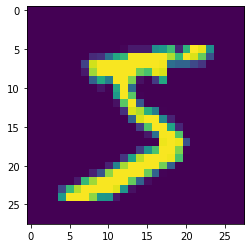

In [9]:
plt.imshow(x_train[0])

In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
'''Now if we use this as it is, the network will think these values are contiunous values a. 
Therefore we perform one hot encoding.'''

'Now if we use this as it is, the network will think these values are contiunous values a '

In [12]:
from tensorflow.keras.utils import to_categorical 


In [47]:
y_cat_test = to_categorical(y_test) 

In [48]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [49]:
y_cat_train = to_categorical(y_train,num_classes=10)

In [21]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [24]:
x_train.min()

0

In [25]:
'''Normalizing data by hardcoding'''

'Normalizing data by hardcoding'

In [26]:
x_train = x_train/255
x_test = x_test/255

(10000, 28, 28)

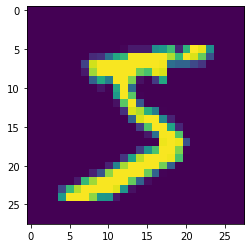

In [31]:
plt.imshow(x_train[0])
x_test.shape

In [32]:
# batch_size,width,height,color_channels 
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [33]:
from tensorflow.keras.models import Sequential 

In [34]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten 

In [45]:
x_test.shape

(10000, 28, 28, 1)

In [61]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

#final output layer 
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [62]:
from tensorflow.keras.callbacks import EarlyStopping 

In [63]:
early_stop = EarlyStopping(monitor='val_loss',patience=1,verbose=1)


In [64]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1378 - accuracy: 0.9576 - val_loss: 0.0559 - val_accuracy: 0.9833
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0481 - accuracy: 0.9851 - val_loss: 0.0401 - val_accuracy: 0.9872
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0299 - accuracy: 0.9906 - val_loss: 0.0451 - val_accuracy: 0.9851
Epoch 3: early stopping


In [59]:
x_train.shape

(60000, 28, 28, 1)

In [65]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 4608)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               589952    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
________________________________________________

In [66]:
loss = model.history.history

In [67]:
loss

{'loss': [0.1378200501203537, 0.04808516055345535, 0.029881762340664864],
 'accuracy': [0.9576166868209839, 0.9851333498954773, 0.9905666708946228],
 'val_loss': [0.055866289883852005, 0.040071338415145874, 0.04506177827715874],
 'val_accuracy': [0.983299970626831, 0.9872000217437744, 0.9850999712944031]}

In [69]:
loss = pd.DataFrame(loss)

In [70]:
loss

,loss,accuracy,val_loss,val_accuracy
0,0.137820,0.957617,0.055866,0.9833
1,0.048085,0.985133,0.040071,0.9872
2,0.029882,0.990567,0.045062,0.9851


<AxesSubplot:>

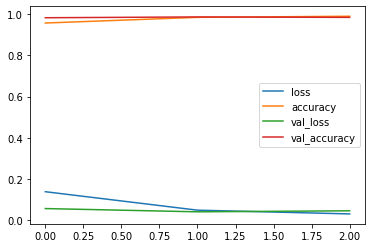

<AxesSubplot:>

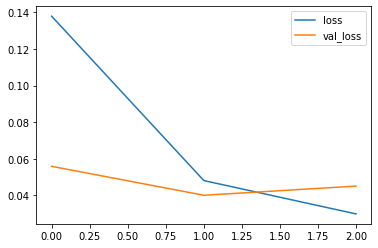

In [74]:
loss[['loss','val_loss']].plot()

<AxesSubplot:>

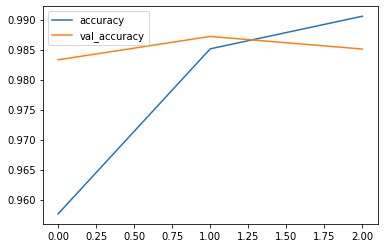

In [75]:
loss[['accuracy','val_accuracy']].plot()

In [77]:
model.metrics_names

['loss', 'accuracy']

In [78]:
model.evaluate(x_test,y_cat_test,verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.0451 - accuracy: 0.9851


[0.04506177827715874, 0.9850999712944031]

In [79]:
from sklearn.metrics import classification_report,confusion_matrix

In [82]:
predictions = np.argmax(model.predict(x_test), axis=-1)

In [83]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.98      0.98      0.98       892
           6       1.00      0.98      0.99       958
           7       0.97      0.99      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.98      0.98     10000
weighted avg       0.99      0.99      0.99     10000



In [84]:
confusion_matrix(y_test,predictions)

array([[ 975,    1,    1,    0,    0,    0,    1,    1,    1,    0],
       [   0, 1133,    1,    1,    0,    0,    0,    0,    0,    0],
       [   1,    5, 1012,    1,    0,    0,    0,   11,    2,    0],
       [   0,    0,    1, 1003,    0,    4,    0,    1,    1,    0],
       [   0,    1,    0,    0,  961,    0,    1,    3,    1,   15],
       [   1,    0,    1,   11,    0,  876,    1,    0,    2,    0],
       [   7,    2,    0,    1,    4,    5,  935,    0,    4,    0],
       [   0,    1,    3,    1,    0,    0,    0, 1020,    1,    2],
       [   2,    2,    1,    3,    0,    3,    0,    6,  952,    5],
       [   1,    4,    0,    3,    4,    5,    0,    7,    1,  984]])

In [85]:
import seaborn as sns 

In [87]:
my_num = x_test[1]

(28, 28, 1)

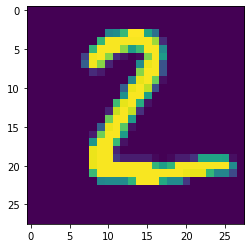

In [90]:
plt.imshow(my_num)

my_num.shape

In [104]:
# num_images,width,height,color_channels
num = np.argmax(model.predict(my_num.reshape(1,28,28,1)), axis=-1)

In [105]:
num

array([2])